1..导入cartopy库，认识一下常用的子模块

In [2]:
import cartopy.crs as ccrs    #用于设置投影
import cartopy.feature as cfeature     #添加特征add_feature的参数
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  #经纬度标签格式
from cartopy.io.shapereader import Reader
from cartopy.feature.nightshade import Nightshade
#这些是其余要用到的库
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import datetime

## 一、绘制地图底图  
2.指定投影方式为等经纬度投影，绘制默认海岸线底图

C:\Users\24667\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\24667\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


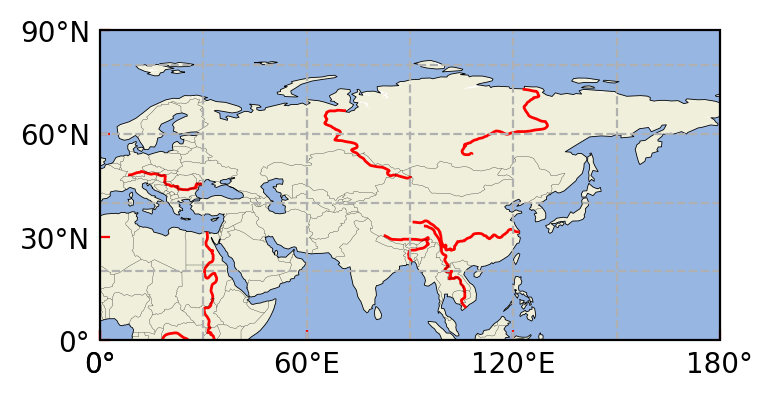

In [24]:
fig = plt.figure(figsize=(4, 4), dpi=200)    #最基础的plt.创建画布
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))   #设置投影  中心经度180
ax.coastlines(lw=0.3) #lw海岸线宽度
ax.add_feature(cfeature.LAND.with_scale('50m')) #添加陆地  with_scale添加绘图精度
ax.add_feature(cfeature.OCEAN) #添加海洋
ax.add_feature(cfeature.RIVERS,lw=1.0,color='r')  #河流  指定颜色
ax.add_feature(cfeature.BORDERS,lw=0.1)   #添加国境线
"""设置设置想要显示的经纬度标签值"""
ax.set_xticks([ 0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
ax.set_yticks([ -90,-60, -30, 0, 30, 60,90], crs=ccrs.PlateCarree())
"""将经纬度标签转换为具有单位的形式"""
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(color = 'red',direction='in') #将刻度设置为红色，并将其指向朝内
"""方法一  选取范围 """
#ax.set_extent([0,180,0,90],crs = ccrs.PlateCarree())  #选取范围 默认为整张地图
"""方法二 """
ax.set_xlim(-180,0)
ax.set_ylim(0,90)

ax.gridlines(linestyle='--')   #网格虚线
ax.set_title('Cartopy')        #标题

## 二、自定义地图形状

In [26]:
vertices = [(20, -60), (40, 60), (140, 60), (160, -60), (20, -60)]#梯形的四个点，首尾相连。如第一个点为左下角的点，经度为20°N，纬度为60°S
boundary = mpath.Path(vertices)
boundary

Path(array([[ 20., -60.],
       [ 40.,  60.],
       [140.,  60.],
       [160., -60.],
       [ 20., -60.]]), None)

C:\Users\24667\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


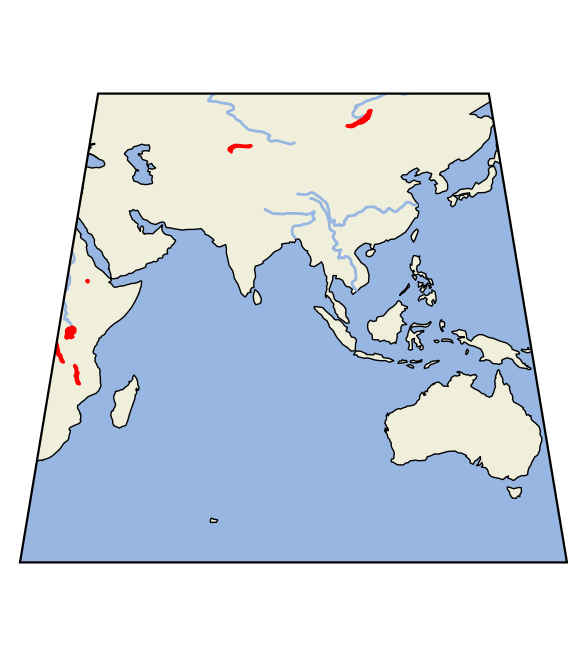

In [27]:
fig = plt.figure(figsize=(4, 4), dpi=200)  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE,lw=0.5)
ax.add_feature(cfeabbture.RIVERS,lw=1.0)
ax.add_feature(cfeature.LAKES,color='r')

ax.set_boundary(boundary, transform=ccrs.PlateCarree())
ax.set_extent([20,160,-60,60])

指定投影方式为兰伯特等角圆锥投影，并将中心经度设置为105°E，中心纬度设置为40°N

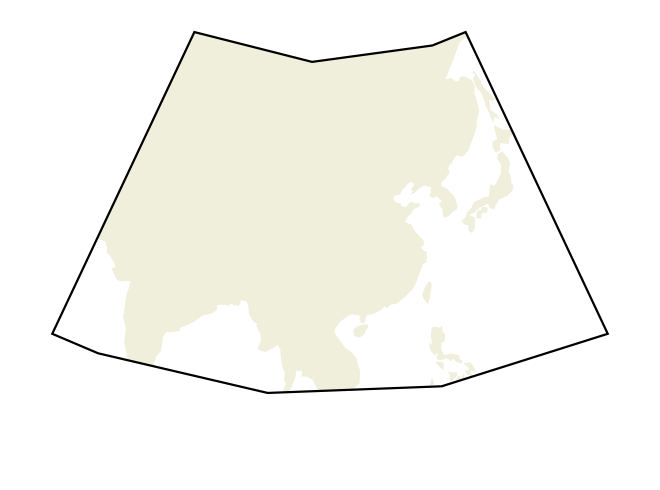

In [56]:
fig=plt.figure(figsize=(4,4),dpi=200)
ax=plt.axes(projection=ccrs.LambertConformal(central_longitude=105, central_latitude=40))
ax.add_feature(cfeature.LAND)
vertices = [(65, 10), (65, 60),(145, 60), (145, 10), (65, 10)]
boundary = mpath.Path(vertices)
#ax.set_boundary(boundary, transform=ccrs.PlateCarree())
ax.set_boundary(boundary, transform=ccrs.PlateCarree())

ax.set_extent([65,145,0,60])


指定投影方式为极地立体投影

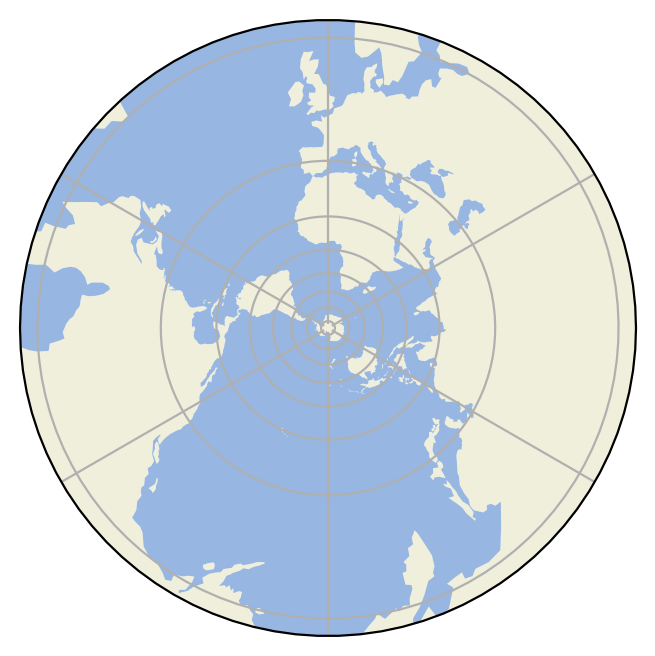

In [41]:
fig = plt.figure(figsize=(4,4),dpi=200)
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.gridlines()

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

## 添加shape文件


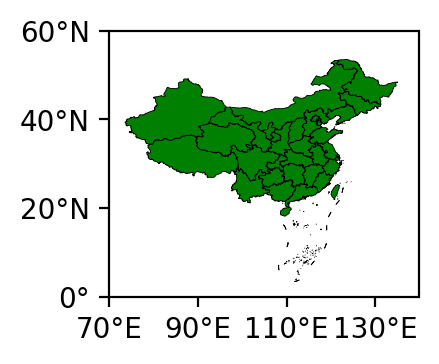

In [46]:
sf = r'F:\shape_data\china_shapefile\china_shapefile.shp'
fig = plt.figure(figsize=(2, 2), dpi=200)  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xticks([ 70,90,110,130], crs=ccrs.PlateCarree())
ax.set_yticks([ 0,20,40,60], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([70,140,0,60], crs=ccrs.PlateCarree())
"""读取中国shp文件中的地理信息，方法一"""
#ax.add_geometries(Reader(sf).geometries(), ccrs.PlateCarree(), edgecolor='k', facecolor='g',linewidth=0.3)
"""方法二"""
china = cfeature.ShapelyFeature(Reader(sf).geometries(), ccrs.PlateCarree(), edgecolor='k', facecolor='g', linewidth=0.3)
ax.add_feature(china)

## 填色图

In [47]:
"""生成经纬度数据"""
nlats=181
lats = np.linspace(-90, 90 ,nlats) #生成纬度数据，从-90°~90°，分辨率为1°
nlons=361
lons = np.linspace(-180, 180 ,nlons) #.生成经度数据，从-180°~180°，分辨率为1°
lons, lats = np.meshgrid(lons, lats)   #将刚刚生成的经纬度数据整合成网格数据
lons ,lats

(array([[-180., -179., -178., ...,  178.,  179.,  180.],
        [-180., -179., -178., ...,  178.,  179.,  180.],
        [-180., -179., -178., ...,  178.,  179.,  180.],
        ...,
        [-180., -179., -178., ...,  178.,  179.,  180.],
        [-180., -179., -178., ...,  178.,  179.,  180.],
        [-180., -179., -178., ...,  178.,  179.,  180.]]),
 array([[-90., -90., -90., ..., -90., -90., -90.],
        [-89., -89., -89., ..., -89., -89., -89.],
        [-88., -88., -88., ..., -88., -88., -88.],
        ...,
        [ 88.,  88.,  88., ...,  88.,  88.,  88.],
        [ 89.,  89.,  89., ...,  89.,  89.,  89.],
        [ 90.,  90.,  90., ...,  90.,  90.,  90.]]))

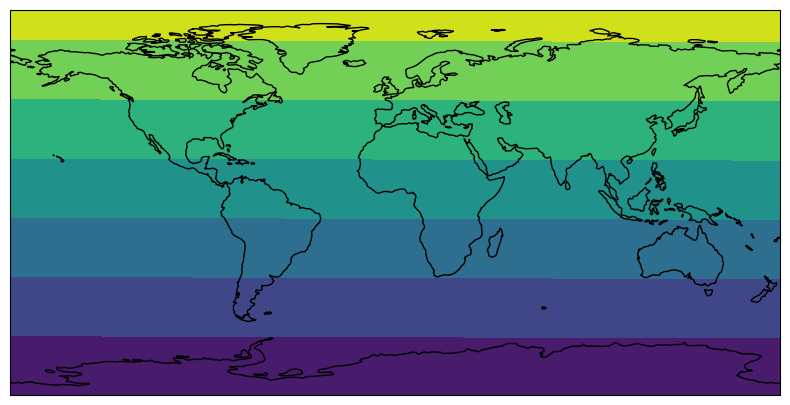

In [48]:
data=np.arange(0,181*361,1).reshape(181,361)  #生成演示用的data，形状为(181,361),大小为0~181*361,间隔为1
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())


ax.contourf(lons, lats, data,transform=ccrs.PlateCarree())
ax.coastlines()

拓展：1.绘制风场ax.quiver  
2.绘制六场ax.streamplot
3.绘制风向标  
4.ax.barb  
# 难点 利用mpath绘制路径 cartopy的夜影模式

In [4]:
import cartopy.crs as ccrs 
help(ccrs)

Help on module cartopy.crs in cartopy:

NAME
    cartopy.crs

DESCRIPTION
    The crs module defines Coordinate Reference Systems and the transformations
    between them.

CLASSES
    builtins.object
        Globe
    _CylindricalProjection(_RectangularProjection)
        PlateCarree
        RotatedPole
    _Eckert(_WarpedRectangularProjection)
        EckertI
        EckertII
        EckertIII
        EckertIV
        EckertV
        EckertVI
    _RectangularProjection(Projection)
        LambertCylindrical
        Miller
    _Satellite(Projection)
        Geostationary
        NearsidePerspective
    _WarpedRectangularProjection(Projection)
        Aitoff
        EqualEarth
        Hammer
        Mollweide
        Robinson
    pyproj.crs.crs.CustomConstructorCRS(pyproj.crs.crs.CRS)
        CRS
            Geocentric
            Geodetic
            Projection
                AlbersEqualArea
                AzimuthalEquidistant
                EquidistantConic
                Gnomoni